Author : Nelson Vithayathil Varghese

This is the Natural Language Processing (NLP) model implementation file for the Named Entity Recogniztion (NER) Task . 


I would be adding the comments at each step to reflect the entire thought process that I have followed during the develpment of this model 

# **PART-1 :: Designing of the NER Model**

**Brief note on Named-entity recognition (NER)**

Named-entity recognition (NER) (also known in another names such as named entity identification,token classification or entity extraction) can be treated as a subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc. From a Machine Learning's perspective, I view  it as supersvised learning,multi-class classfication problem where each class denotes the various entities that are mentioned above.Here the data source is an unstructured text

**NER NLP Model Design Approach**

In order to develop this model, I would be adopting a Deep Learning oriented approach wherein  the state-of-the-art method of Transfer Learning with Transformers would be employed.As per my understanding, this method has two key steps: pre-training followed by fine-tuning. 

Firstly use a pre-trained language model  such as (Transformer stack namely BERT)  that was trained on the large corpus of textual data (from a source like wikipedia),then subsequently training this model on the custom dataset used for this specific problem( Kaggle Dataset named Annotated Corpus for Named Entity Recognition(Datasetfile name: ner_dataset.csv) ) and specialize / tune it for the given NER task.

As stated above, I would be using pre-trained Transformer encoder( BERT) model from the Hugging face



simpletransformers is a python package library that is based on the Transformers library by the Hugging Face and  basically it is built as a wrapper around the t Transformers library made by Hugging Face.

Reference websites that I have used while building the model.

https://pypi.org/project/simpletransformers/

https://simpletransformers.ai/docs/ner-model/

https://huggingface.co/models?pipeline_tag=token-classification&sort=downloads

https://www.kaggle.com/datasets/abhinavwalia95/entity-annotated-corpus



In [ ]:
!pip install simpletransformers

     |████████████████████████████████| 249 kB 5.4 MB/s 
     |████████████████████████████████| 4.0 MB 42.4 MB/s 
     |████████████████████████████████| 1.8 MB 30.7 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 10.1 MB 32.4 MB/s 
     |████████████████████████████████| 6.6 MB 29.2 MB/s 
     |████████████████████████████████| 1.2 MB 33.8 MB/s 
     |████████████████████████████████| 325 kB 45.4 MB/s 
     |████████████████████████████████| 596 kB 36.8 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 895 kB 37.1 MB/s 
     |████████████████████████████████| 144 kB 31.6 MB/s 
     |████████████████████████████████| 181 kB 33.4 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 136 kB 51.0 MB/s 
     |████████████████████████████████| 1.1 MB 36.4 MB/s 
     |████████████████████████████████| 212 kB 40.7 MB/s 
     |██████████████

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

# Obtain the data

I am using a helper function that can be used from both colab / Jupyter notebook environment to fetch the data into a Pandas dataframe for further analysis

In [ ]:
# Helper funtion for reading the csv dataset file and generating the dataframe
def load_dataset(file_name):
    
    data_path = os.path.join(os.getcwd(),file_name)
#     return pd.read_excel(data_path,index_col = 0)
    return pd.read_csv(data_path,encoding='latin1')

In [ ]:
df_data = load_dataset('ner_dataset.csv')
df_data.head(27)

Sentence #           Word  POS    Tag
0   Sentence: 1      Thousands  NNS      O
1           NaN             of   IN      O
2           NaN  demonstrators  NNS      O
3           NaN           have  VBP      O
4           NaN        marched  VBN      O
5           NaN        through   IN      O
6           NaN         London  NNP  B-geo
7           NaN             to   TO      O
8           NaN        protest   VB      O
9           NaN            the   DT      O
10          NaN            war   NN      O
11          NaN             in   IN      O
12          NaN           Iraq  NNP  B-geo
13          NaN            and   CC      O
14          NaN         demand   VB      O
15          NaN            the   DT      O
16          NaN     withdrawal   NN      O
17          NaN             of   IN      O
18          NaN        British   JJ  B-gpe
19          NaN         troops  NNS      O
20          NaN           from   IN      O
21          NaN           that   DT      O
22          NaN        country   NN      O
23          NaN              .    .      O
24  Sentence: 2       Families  NNS      O
25          NaN             of   IN      O
26          NaN       soldiers  NNS      O

# Exploratory Data Analysis(EDA)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72706 entries, 0 to 72705
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  3300 non-null   object
 1   Word        72706 non-null  object
 2   POS         72706 non-null  object
 3   Tag         72706 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB


In [ ]:
df_data.columns

Index(['Sentence #', 'Word', 'POS', 'Tag'], dtype='object')

In [ ]:
df_data['Tag'].nunique()

17

In [ ]:
# Named Entity Values ( Label / Ground Truth Values)
tags = df_data['Tag'].unique()
pd.DataFrame(data=tags,columns=['Named Entities[Label Values]'])

Named Entities[Label Values]
0                             O
1                         B-geo
2                         B-gpe
3                         B-per
4                         I-geo
5                         B-org
6                         I-org
7                         B-tim
8                         B-art
9                         I-art
10                        I-per
11                        I-gpe
12                        I-tim
13                        B-nat
14                        B-eve
15                        I-eve
16                        I-nat

In [ ]:
# Similar kind of analysis for the POS ( Parts Of Speach column)
tags = df_data['POS'].unique()
pd.DataFrame(data=tags,columns=['Parts Of Speach Values'])

Parts Of Speach Values
0                     NNS
1                      IN
2                     VBP
3                     VBN
4                     NNP
5                      TO
6                      VB
7                      DT
8                      NN
9                      CC
10                     JJ
11                      .
12                    VBD
13                     WP
14                     ``
15                     CD
16                    PRP
17                    VBZ
18                    POS
19                    VBG
20                     RB
21                      ,
22                    WRB
23                   PRP$
24                     MD
25                    WDT
26                    JJR
27                      :
28                    JJS
29                    WP$
30                     RP
31                    PDT
32                   NNPS
33                     EX
34                    RBS
35                    LRB
36                    RRB
37                      $
38                    RBR
39                      ;
40                     UH

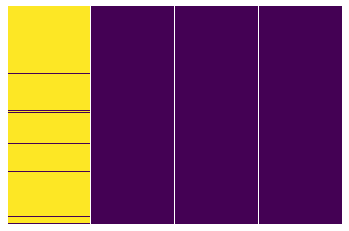

In [ ]:
# Visually check for any missing / null values
sns.heatmap(df_data.isnull(),xticklabels=False,yticklabels=False,cbar = False,cmap='viridis')

# Preprocessing

In [ ]:
# Sentence column has NaN values for the words other than teh first word of a sentence in Sentence #
df_data.loc[:,'Sentence #'] = df_data['Sentence #'].fillna(method='ffill')

In [ ]:
df_data.head(27)

Sentence #           Word  POS    Tag
0   Sentence: 1      Thousands  NNS      O
1   Sentence: 1             of   IN      O
2   Sentence: 1  demonstrators  NNS      O
3   Sentence: 1           have  VBP      O
4   Sentence: 1        marched  VBN      O
5   Sentence: 1        through   IN      O
6   Sentence: 1         London  NNP  B-geo
7   Sentence: 1             to   TO      O
8   Sentence: 1        protest   VB      O
9   Sentence: 1            the   DT      O
10  Sentence: 1            war   NN      O
11  Sentence: 1             in   IN      O
12  Sentence: 1           Iraq  NNP  B-geo
13  Sentence: 1            and   CC      O
14  Sentence: 1         demand   VB      O
15  Sentence: 1            the   DT      O
16  Sentence: 1     withdrawal   NN      O
17  Sentence: 1             of   IN      O
18  Sentence: 1        British   JJ  B-gpe
19  Sentence: 1         troops  NNS      O
20  Sentence: 1           from   IN      O
21  Sentence: 1           that   DT      O
22  Sentence: 1        country   NN      O
23  Sentence: 1              .    .      O
24  Sentence: 2       Families  NNS      O
25  Sentence: 2             of   IN      O
26  Sentence: 2       soldiers  NNS      O

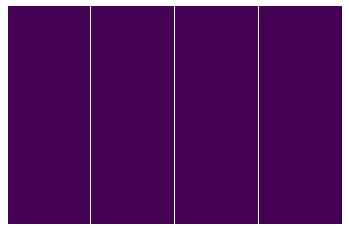

In [ ]:
# Visually check for any missing / null values
sns.heatmap(df_data.isnull(),xticklabels=False,yticklabels=False,cbar = False,cmap='viridis')

In [ ]:
df_data['Sentence #'].unique()

array(['Sentence: 1', 'Sentence: 2', 'Sentence: 3', ..., 'Sentence: 3298',
       'Sentence: 3299', 'Sentence: 3300'], dtype=object)

In [ ]:
# Sentence column names ( Ex. Sentence 1) for each statement needs to be converted a numerical column 
# before building the model
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_data['Sentence #'] = LabelEncoder().fit_transform(df_data['Sentence #'] )

In [ ]:
df_model_data = df_data.drop('POS', axis=1)

In [ ]:
# For better readability 
df_model_data.rename(columns={'Sentence #':'sentence_id','Word':'words','Tag':'labels'}, inplace =True)

In [ ]:
df_model_data.columns

Index(['sentence_id', 'words', 'labels'], dtype='object')

In [ ]:
X = df_model_data.drop('labels',axis=1)

In [ ]:
y = df_model_data['labels']

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# model_train_data frame
model_train_data = pd.DataFrame({'sentence_id':X_train['sentence_id'],'words':X_train['words'],'labels':y_train})

In [ ]:
# model_test_data frame
model_test_data = pd.DataFrame({'sentence_id':X_test['sentence_id'],'words':X_test['words'],'labels':y_test})

In [ ]:
from simpletransformers.ner import NERModel,NERArgs

In [ ]:
# Get the list of all the unique NER Tags from the dataset
labels = df_data['Tag'].unique().tolist()
# Changing it to uppercase for better readability
# labels = [label.upper() for label in labels]
# labels

In [ ]:
args = NERArgs()
args.num_train_epochs = 4
args.learning_rate = 1e-4
args.overwrite_output_dir =True
args.train_batch_size = 32
args.eval_batch_size = 32

In [ ]:
import torch
cuda_available = torch.cuda.is_available()
cuda_available

True

In [ ]:
model = NERModel('bert', 'bert-base-cased',labels=labels,args=args,use_cuda=cuda_available)
# model = NERModel('bert', 'bert-large-cased',labels=labels,args=args,use_cuda=cuda_available)
# model = NERModel('bert', 'dslim/bert-base-NER',labels=labels,args=args,use_cuda=cuda_available)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [ ]:
model.train_model(model_train_data,eval_data = model_test_data)

  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/104 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 4:   0%|          | 0/104 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/104 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/104 [00:00<?, ?it/s]

(416, 0.2001776703982614)

In [ ]:
result, model_outputs, wrong_preds = model.eval_model(model_test_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/101 [00:00<?, ?it/s]

In [ ]:
result

{'eval_loss': 0.24191208773910408,
 'f1_score': 0.7551365723954556,
 'precision': 0.7884906612821807,
 'recall': 0.7244897959183674}

# **PART-2 :: Application based on  the NER Model**

Part-2 has following major sub-components

1) Unit Test program to test the NER Model 

2) Web Scraper Application for the Google News Feed 

3) A database to store the execution results of NER Model testing for the text data generated from step-2

# Unit Test Program for the NER Model

In [ ]:
# This is the unit test code for the NER Model validation
def unit_test_NER_model(test_data):
  prediction, model_output = model.predict(test_data)
  print(prediction)
  print('\n\n')

if __name__ == '__main__':
  # Set test_data to something other than 'quit'.
  test_data = ''
  # Start a loop that will run until the user enters 'quit'.
  while test_data != 'quit':
    # Ask the user for a input.
    test_data = input("Please enter the unit test input for the  NER Model, or enter 'quit': ")    
    
    if test_data != 'quit':
      unit_test_NER_model([test_data])
    else:
      # Quiting the test .
      print('Quiting the Unit Test for NER Model')

Please enter the unit test input for the  NER Model, or enter 'quit': Canada is a country


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Canada': 'B-geo'}, {'is': 'O'}, {'a': 'O'}, {'country': 'O'}]]



Please enter the unit test input for the  NER Model, or enter 'quit':  Commonwealth is a political association of 54 member state.


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Commonwealth': 'B-org'}, {'is': 'O'}, {'a': 'O'}, {'political': 'O'}, {'association': 'O'}, {'of': 'O'}, {'54': 'O'}, {'member': 'O'}, {'state.': 'O'}]]



Please enter the unit test input for the  NER Model, or enter 'quit': Ottawa is the capital of Canada and Justin Trudeau is the prime minister


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ottawa': 'B-geo'}, {'is': 'O'}, {'the': 'O'}, {'capital': 'O'}, {'of': 'O'}, {'Canada': 'B-geo'}, {'and': 'O'}, {'Justin': 'B-per'}, {'Trudeau': 'I-per'}, {'is': 'O'}, {'the': 'O'}, {'prime': 'O'}, {'minister': 'O'}]]



Please enter the unit test input for the  NER Model, or enter 'quit': Lionel Messi is a football player and he lives in France while Ronaldo lives in London


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Lionel': 'B-per'}, {'Messi': 'I-per'}, {'is': 'O'}, {'a': 'O'}, {'football': 'O'}, {'player': 'O'}, {'and': 'O'}, {'he': 'O'}, {'lives': 'O'}, {'in': 'O'}, {'France': 'B-geo'}, {'while': 'O'}, {'Ronaldo': 'B-per'}, {'lives': 'O'}, {'in': 'O'}, {'London': 'B-geo'}]]



Please enter the unit test input for the  NER Model, or enter 'quit': quit
Quiting the Unit Test for NER Model


# Web Scraper Application for the Google News Feed 

 pygooglenews - A python wrapper of the Google News RSS feed

 https://pypi.org/project/pygooglenews/

In [ ]:
!pip install pygooglenews

     |████████████████████████████████| 128 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 9.7 MB/s 
     |████████████████████████████████| 362 kB 9.6 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Created wheel for feedparser: filename=feedparser-5.2.1-py3-none-any.whl size=44952 sha256=073a6e6e56be6d8b22b3d7944e3e1b22fbe995ba55c8732f0a0877ddeff3aef2
  Stored in directory: /root/.cache/pip/wheels/29/bf/46/b4a597d435d3aee6c2fa583824897336d65abf13ebe3405b70
Successfully built feedparser
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the so

In [ ]:
from pygooglenews import GoogleNews

gnews = GoogleNews(country='Canada')

def get_news(search_title):
  stories = []
  search = gnews.search(search_title)
  newsitem = search['entries']
  for item in newsitem:
    story = [item.title]            
    stories.append(story)
    
  return stories
  
if __name__ == '__main__':
  news_data = get_news('Ukraine')
  print(news_data)
  print('\n\n')
  for item in range(len(news_data)):
    prediction, model_output = model.predict(news_data[item])
    print(prediction)


[["Russia's war in Ukraine - CNN"], ['Looming ground battle is crucial phase in Ukraine, U.S. officials say - The Washington Post'], ['Latest Russia-Ukraine War News: Live Updates - The New York Times'], ['Russia-Ukraine war: What happened today (April 25) - NPR'], ["The threat of nuclear war is real, top Russian official says; U.S. wants to see Moscow 'weakened'. - CNBC"], ['America’s Road to the Ukraine War - The New York Times'], ['Uniting for Ukraine - Homeland Security'], ['Russia hits faraway targets; diplomat warns of risk of WWIII - The Associated Press'], ['April 24, 2022 Russia-Ukraine news - CNN'], ['The Strategic Logic of Russia’s War on Ukraine - The Wall Street Journal'], ['The War in Ukraine Has Unleashed a New Word - The New York Times'], ['Russia accuses Nato of ‘proxy war’ in Ukraine as US hosts crucial defence summit - The Guardian'], ["U.S. wants Russia 'weakened,' sees critical phase in east - The Washington Post"], ['How the Czech Republic is supporting Ukraine ag

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{"Russia's": 'B-geo'}, {'war': 'O'}, {'in': 'O'}, {'Ukraine': 'B-org'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Looming': 'B-per'}, {'ground': 'O'}, {'battle': 'O'}, {'is': 'O'}, {'crucial': 'O'}, {'phase': 'O'}, {'in': 'O'}, {'Ukraine,': 'B-geo'}, {'U.S.': 'B-geo'}, {'officials': 'O'}, {'say': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Latest': 'O'}, {'Russia-Ukraine': 'B-geo'}, {'War': 'O'}, {'News:': 'I-org'}, {'Live': 'O'}, {'Updates': 'O'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia-Ukraine': 'B-org'}, {'war:': 'O'}, {'What': 'O'}, {'happened': 'O'}, {'today': 'B-tim'}, {'(April': 'O'}, {'25)': 'I-tim'}, {'-': 'O'}, {'NPR': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'The': 'O'}, {'threat': 'O'}, {'of': 'O'}, {'nuclear': 'O'}, {'war': 'O'}, {'is': 'O'}, {'real,': 'O'}, {'top': 'O'}, {'Russian': 'B-gpe'}, {'official': 'O'}, {'says;': 'O'}, {'U.S.': 'B-geo'}, {'wants': 'O'}, {'to': 'O'}, {'see': 'O'}, {'Moscow': 'B-geo'}, {"'weakened'.": 'O'}, {'-': 'O'}, {'CNBC': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'America’s': 'B-geo'}, {'Road': 'O'}, {'to': 'O'}, {'the': 'O'}, {'Ukraine': 'B-geo'}, {'War': 'O'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Uniting': 'O'}, {'for': 'O'}, {'Ukraine': 'O'}, {'-': 'O'}, {'Homeland': 'B-org'}, {'Security': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia': 'B-geo'}, {'hits': 'O'}, {'faraway': 'O'}, {'targets;': 'O'}, {'diplomat': 'O'}, {'warns': 'O'}, {'of': 'O'}, {'risk': 'O'}, {'of': 'O'}, {'WWIII': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Associated': 'B-org'}, {'Press': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'April': 'B-tim'}, {'24,': 'I-tim'}, {'2022': 'B-tim'}, {'Russia-Ukraine': 'B-org'}, {'news': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'The': 'O'}, {'Strategic': 'I-org'}, {'Logic': 'O'}, {'of': 'O'}, {'Russia’s': 'B-geo'}, {'War': 'O'}, {'on': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'Wall': 'B-org'}, {'Street': 'I-org'}, {'Journal': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'The': 'O'}, {'War': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'Has': 'O'}, {'Unleashed': 'O'}, {'a': 'O'}, {'New': 'B-org'}, {'Word': 'O'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia': 'B-geo'}, {'accuses': 'O'}, {'Nato': 'I-per'}, {'of': 'O'}, {'‘proxy': 'O'}, {'war’': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'as': 'O'}, {'US': 'B-gpe'}, {'hosts': 'O'}, {'crucial': 'O'}, {'defence': 'O'}, {'summit': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'U.S.': 'B-geo'}, {'wants': 'O'}, {'Russia': 'B-geo'}, {"'weakened,'": 'O'}, {'sees': 'O'}, {'critical': 'O'}, {'phase': 'O'}, {'in': 'O'}, {'east': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'How': 'O'}, {'the': 'O'}, {'Czech': 'B-gpe'}, {'Republic': 'I-geo'}, {'is': 'O'}, {'supporting': 'O'}, {'Ukraine': 'B-org'}, {'against': 'O'}, {'Russia': 'B-org'}, {'-': 'O'}, {'PBS': 'B-org'}, {'NewsHour': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'What': 'O'}, {'Happened': 'O'}, {'on': 'I-tim'}, {'Day': 'B-tim'}, {'59': 'O'}, {'of': 'O'}, {'the': 'O'}, {'War': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'What': 'O'}, {'Happened': 'O'}, {'on': 'I-tim'}, {'Day': 'B-tim'}, {'58': 'I-tim'}, {'of': 'O'}, {'the': 'O'}, {'War': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'war': 'O'}, {'live:': 'O'}, {'NATO': 'B-org'}, {'is': 'O'}, {"'in": 'O'}, {'essence': 'O'}, {'engaged': 'O'}, {'in': 'O'}, {"war'": 'O'}, {'according': 'O'}, {'to': 'O'}, {'Russia': 'B-org'}, {'-': 'O'}, {'ABC': 'B-org'}, {'News': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Bloodshed': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'continued': 'O'}, {'into': 'O'}, {'Orthodox': 'O'}, {'Easter': 'B-tim'}, {'holiday': 'I-tim'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'As': 'O'}, {'Russia': 'B-geo'}, {'targets': 'O'}, {'eastern': 'O'}, {'Ukraine,': 'B-geo'}, {'Kyiv': 'I-geo'}, {'cautiously': 'O'}, {'reopens': 'O'}, {'-': 'O'}, {'Al': 'B-org'}, {'Jazeera': 'I-org'}, {'English': 'B-gpe'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'war:': 'O'}, {'False': 'B-org'}, {'TikTok': 'B-org'}, {'videos': 'O'}, {'draw': 'O'}, {'millions': 'O'}, {'of': 'O'}, {'views': 'O'}, {'-': 'O'}, {'BBC': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'What': 'O'}, {'Happened': 'O'}, {'on': 'I-tim'}, {'Day': 'B-tim'}, {'57': 'I-tim'}, {'of': 'O'}, {'the': 'O'}, {'War': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia': 'B-geo'}, {'attacks': 'O'}, {'Ukrainian': 'B-gpe'}, {'sites': 'O'}, {'far': 'O'}, {'from': 'O'}, {'eastern': 'O'}, {'Donbas,': 'I-geo'}, {'as': 'O'}, {'ICC': 'B-org'}, {'agrees': 'O'}, {'to': 'O'}, {'investigate': 'O'}, {'war': 'O'}, {'crimes': 'O'}, {'-': 'O'}, {'CBC': 'B-org'}, {'News': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Biden': 'I-per'}, {'Picks': 'O'}, {'Bridget': 'B-per'}, {'Brink': 'I-per'}, {'to': 'O'}, {'Be': 'O'}, {'Ambassador': 'O'}, {'to': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia-Ukraine': 'B-org'}, {'war:': 'O'}, {'What': 'O'}, {'happened': 'O'}, {'today': 'B-tim'}, {'(April': 'O'}, {'14)': 'I-tim'}, {'-': 'O'}, {'NPR': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'U.S.': 'B-gpe'}, {'defense': 'O'}, {'secretary': 'O'}, {"'wants": 'O'}, {'to': 'O'}, {'see': 'O'}, {'Russia': 'B-geo'}, {"weakened'": 'O'}, {'as': 'O'}, {"Ukraine's": 'B-org'}, {'railways': 'O'}, {'are': 'O'}, {'hit': 'O'}, {'-': 'O'}, {'NPR': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{"Russia's": 'B-geo'}, {'eastern': 'O'}, {'offensive': 'O'}, {'has': 'O'}, {'begun,': 'O'}, {'Ukraine': 'B-geo'}, {'says,': 'O'}, {'as': 'O'}, {'strikes': 'O'}, {'rock': 'O'}, {'Lviv': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'war:': 'O'}, {'An': 'O'}, {'extraordinary': 'O'}, {'moment': 'O'}, {'of': 'O'}, {'kindness': 'O'}, {'in': 'O'}, {'Kharkiv': 'B-geo'}, {'after': 'O'}, {'eight': 'O'}, {'weeks': 'O'}, {'of': 'O'}, {'bombardment': 'O'}, {'-': 'O'}, {'Sky': 'B-org'}, {'News': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'What': 'O'}, {"it's": 'O'}, {'like': 'O'}, {'to': 'O'}, {'volunteer': 'O'}, {'on': 'O'}, {'the': 'O'}, {'front': 'O'}, {'lines': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{"'The": 'O'}, {'race': 'O'}, {'is': 'O'}, {"on':": 'O'}, {'Britain': 'B-geo'}, {'moves': 'O'}, {'to': 'O'}, {'get': 'O'}, {'heavy': 'O'}, {'artillery': 'O'}, {'to': 'O'}, {'Ukraine': 'O'}, {'-': 'O'}, {'DefenseNews.com': 'O'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'war:': 'O'}, {'Putin': 'I-per'}, {'accuses': 'O'}, {'West': 'B-org'}, {'of': 'O'}, {'plot': 'O'}, {'to': 'O'}, {'destroy': 'O'}, {'Russia': 'B-geo'}, {'-': 'O'}, {'and': 'O'}, {'says': 'O'}, {'secret': 'O'}, {'service': 'O'}, {'foiled': 'O'}, {'attempt': 'O'}, {'to': 'O'}, {'kill': 'O'}, {'journalist': 'O'}, {'-': 'O'}, {'Sky': 'B-org'}, {'News': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'has': 'O'}, {'taught': 'O'}, {'us': 'O'}, {'all': 'O'}, {'a': 'O'}, {'lesson': 'O'}, {'in': 'O'}, {'moral': 'O'}, {'courage': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Putin': 'I-per'}, {'wants': 'O'}, {'to': 'O'}, {'de-Nazify': 'O'}, {'Ukraine': 'B-geo'}, {'—': 'O'}, {"that's": 'O'}, {'ludicrous,': 'O'}, {'say': 'O'}, {'the': 'O'}, {"country's": 'O'}, {'Jews': 'O'}, {'-': 'O'}, {'POLITICO': 'B-org'}, {'Europe': 'B-geo'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'HSBC': 'B-org'}, {'profits': 'O'}, {'fall': 'O'}, {'nearly': 'O'}, {'30%': 'O'}, {'amid': 'O'}, {'Ukraine': 'B-org'}, {'war': 'O'}, {'and': 'O'}, {'default': 'O'}, {'fears': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Why': 'O'}, {'Ukraine': 'B-org'}, {'aid': 'O'}, {'might': 'O'}, {'have': 'O'}, {'a': 'O'}, {'hard': 'O'}, {'time': 'O'}, {'passing': 'O'}, {'the': 'O'}, {'Senate': 'B-org'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russian': 'B-gpe'}, {'Military’s': 'I-org'}, {'Next': 'O'}, {'Front': 'O'}, {'Line:': 'O'}, {'Replacing': 'O'}, {'Battlefield': 'O'}, {'Equipment': 'O'}, {'Destroyed': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'Wall': 'B-org'}, {'Street': 'I-org'}, {'Journal': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Where': 'O'}, {'Are': 'O'}, {'Germany’s': 'B-geo'}, {'Weapons': 'O'}, {'for': 'O'}, {'Ukraine?': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'Wall': 'B-org'}, {'Street': 'I-org'}, {'Journal': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'War': 'I-eve'}, {'in': 'O'}, {'Ukraine:': 'B-geo'}, {'The': 'O'}, {'village': 'O'}, {'with': 'O'}, {'Russia': 'B-geo'}, {'and': 'O'}, {'Belarus': 'B-geo'}, {'on': 'O'}, {'its': 'O'}, {'doorstep': 'O'}, {'-': 'O'}, {'BBC': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Why': 'O'}, {'Ukraine': 'B-org'}, {'Is': 'O'}, {'Winning': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Atlantic': 'B-geo'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'The': 'O'}, {'volunteers': 'O'}, {'saving': 'O'}, {'animals': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'–': 'O'}, {'photo': 'O'}, {'essay': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Crimes': 'I-org'}, {'against': 'O'}, {'history:': 'O'}, {'mapping': 'O'}, {'the': 'O'}, {'destruction': 'O'}, {'of': 'O'}, {'Ukraine’s': 'B-geo'}, {'culture': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'What': 'O'}, {'Happened': 'O'}, {'on': 'O'}, {'Day': 'B-tim'}, {'43': 'I-tim'}, {'of': 'O'}, {'Russia’s': 'B-geo'}, {'Invasion': 'O'}, {'of': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia': 'B-geo'}, {'invades': 'O'}, {'Ukraine:': 'B-geo'}, {'Live': 'O'}, {'updates': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia-Ukraine': 'B-geo'}, {'latest': 'O'}, {'updates:': 'O'}, {'UN': 'B-org'}, {'chief': 'O'}, {'to': 'O'}, {'meet': 'O'}, {'Putin': 'I-per'}, {'in': 'O'}, {'Moscow': 'B-geo'}, {'-': 'O'}, {'Al': 'B-org'}, {'Jazeera': 'I-per'}, {'English': 'B-gpe'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'April': 'B-tim'}, {'1,': 'I-tim'}, {'2022': 'B-tim'}, {'Russia-Ukraine': 'B-org'}, {'news': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'World': 'O'}, {'leaders': 'O'}, {'condemn': 'O'}, {'atrocities': 'O'}, {'alleged': 'O'}, {'in': 'O'}, {'Bucha,': 'I-org'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'U.K.': 'B-org'}, {'bolsters': 'O'}, {'Ukrainians;': 'B-gpe'}, {'Syria': 'B-geo'}, {'vet': 'O'}, {'put': 'O'}, {'in': 'O'}, {'command': 'O'}, {'of': 'O'}, {'Russians': 'B-gpe'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Evidence': 'O'}, {'some': 'O'}, {'Ukrainian': 'B-gpe'}, {'women': 'O'}, {'raped': 'O'}, {'before': 'O'}, {'being': 'O'}, {'killed,': 'O'}, {'say': 'O'}, {'doctors': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia-Ukraine': 'B-org'}, {'Latest': 'O'}, {'News:': 'O'}, {'April': 'B-tim'}, {'8,': 'I-tim'}, {'2022': 'B-tim'}, {'-': 'O'}, {'Bloomberg': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Blasts': 'B-org'}, {'hit': 'O'}, {'ministry': 'O'}, {'in': 'O'}, {'Moldova’s': 'B-geo'}, {'Transnistria,': 'B-geo'}, {'near': 'O'}, {'Ukraine': 'O'}, {'-': 'O'}, {'Al': 'B-org'}, {'Jazeera': 'I-org'}, {'English': 'B-gpe'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia-Ukraine': 'B-org'}, {'Latest': 'O'}, {'News:': 'O'}, {'April': 'B-tim'}, {'4,': 'I-tim'}, {'2022': 'B-tim'}, {'-': 'O'}, {'Bloomberg': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine:': 'B-geo'}, {'civilian': 'O'}, {'casualty': 'O'}, {'update': 'O'}, {'25': 'I-tim'}, {'April': 'B-tim'}, {'2022': 'B-tim'}, {'-': 'O'}, {'OHCHR': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia-Ukraine': 'B-geo'}, {'war': 'O'}, {'news': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Let': 'O'}, {'Ukraine': 'B-geo'}, {'In': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Atlantic': 'B-geo'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'What': 'O'}, {"Macron's": 'I-per'}, {'victory': 'O'}, {'in': 'O'}, {'France': 'B-geo'}, {'means': 'O'}, {'for': 'O'}, {'Ukraine': 'B-org'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Nuclear': 'O'}, {'weapons': 'O'}, {'manufacturers': 'O'}, {'see': 'O'}, {'stock': 'O'}, {'prices': 'O'}, {'rise': 'O'}, {'amid': 'O'}, {"Russia's": 'B-org'}, {'invasion': 'O'}, {'of': 'O'}, {'Ukraine': 'O'}, {'-': 'O'}, {'CNBC': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine’s': 'B-geo'}, {'Grim': 'O'}, {'Economic': 'I-org'}, {'Toll': 'O'}, {'From': 'O'}, {'War': 'O'}, {'Confronts': 'O'}, {'World': 'O'}, {'Governments': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Wall': 'B-org'}, {'Street': 'I-org'}, {'Journal': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Vladimir': 'I-per'}, {'Putin': 'I-per'}, {'abandons': 'O'}, {'hopes': 'O'}, {'of': 'O'}, {'Ukraine': 'B-geo'}, {'deal': 'O'}, {'and': 'O'}, {'shifts': 'O'}, {'to': 'O'}, {'land-grab': 'O'}, {'strategy': 'O'}, {'-': 'O'}, {'Financial': 'B-org'}, {'Times': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'War': 'O'}, {'Prompts': 'O'}, {"Europe's": 'B-geo'}, {'New': 'B-org'}, {'Emergency': 'O'}, {'Rules': 'I-org'}, {'for': 'O'}, {'the': 'O'}, {'Internet': 'O'}, {'-': 'O'}, {'WIRED': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'marks': 'O'}, {'Orthodox': 'O'}, {'Easter': 'B-tim'}, {'with': 'O'}, {'prayers': 'O'}, {'for': 'O'}, {'those': 'O'}, {'trapped': 'O'}, {'-': 'O'}, {'NPR': 'O'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russian': 'B-gpe'}, {'retreat': 'O'}, {'reveals': 'O'}, {'destruction': 'O'}, {'as': 'O'}, {'Ukraine': 'B-geo'}, {'asks': 'O'}, {'for': 'O'}, {'help': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Associated': 'B-org'}, {'Press': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia-Ukraine': 'B-org'}, {'Latest': 'O'}, {'News:': 'O'}, {'April': 'B-tim'}, {'12,': 'I-tim'}, {'2022': 'B-tim'}, {'-': 'O'}, {'Bloomberg': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'hopes': 'O'}, {'for': 'O'}, {'cease-fire': 'O'}, {'as': 'O'}, {'Istanbul': 'B-org'}, {'hosts': 'O'}, {'new': 'O'}, {'talks': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'A': 'O'}, {'long': 'O'}, {'war': 'O'}, {'of': 'O'}, {'attrition': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'will': 'O'}, {'have': 'O'}, {'huge': 'O'}, {'global': 'O'}, {'consequences': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'economy': 'O'}, {'seen': 'O'}, {'being': 'O'}, {'slashed': 'O'}, {'in': 'O'}, {'half;': 'O'}, {'Austrian': 'B-gpe'}, {'leader': 'O'}, {'will': 'O'}, {'meet': 'O'}, {'Putin': 'I-per'}, {'in': 'O'}, {'Moscow': 'B-geo'}, {'on': 'O'}, {'Monday': 'B-tim'}, {'-': 'O'}, {'CNBC': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia-Ukraine': 'B-org'}, {'Latest': 'O'}, {'News:': 'O'}, {'April': 'B-tim'}, {'7,': 'I-tim'}, {'2022': 'B-tim'}, {'-': 'O'}, {'Bloomberg': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'Apologizes': 'O'}, {'to': 'O'}, {'Japan': 'B-geo'}, {'for': 'O'}, {'Comparing': 'O'}, {'Emperor': 'B-per'}, {'Hirohito': 'I-per'}, {'to': 'O'}, {'Hitler': 'B-per'}, {'on': 'O'}, {'Twitter': 'O'}, {'-': 'O'}, {'Bloomberg': 'I-per'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'war:': 'O'}, {'Ben': 'B-per'}, {'Wallace': 'I-per'}, {'says': 'O'}, {'15,000': 'O'}, {'Russian': 'B-gpe'}, {'troops': 'O'}, {'dead': 'O'}, {'as': 'O'}, {'UK': 'B-org'}, {'to': 'O'}, {'send': 'O'}, {'anti-aircraft': 'O'}, {'vehicles': 'O'}, {'-': 'O'}, {'Daily': 'B-org'}, {'Mail': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Lessons': 'O'}, {'in': 'O'}, {'patriotism': 'O'}, {'used': 'O'}, {'to': 'O'}, {'justify': 'O'}, {'Ukraine': 'B-geo'}, {'invasion': 'O'}, {'to': 'O'}, {'Russia’s': 'B-geo'}, {'children': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia-Ukraine': 'B-org'}, {'Latest': 'O'}, {'News:': 'O'}, {'March': 'B-tim'}, {'31': 'I-tim'}, {'2022': 'B-tim'}, {'-': 'O'}, {'Bloomberg': 'I-per'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Rocket': 'O'}, {'attack': 'O'}, {'on': 'O'}, {'Ukraine': 'B-geo'}, {'train': 'O'}, {'station': 'O'}, {'kills': 'O'}, {'at': 'O'}, {'least': 'O'}, {'50': 'O'}, {'trying': 'O'}, {'to': 'O'}, {'flee,': 'O'}, {'scores': 'O'}, {'injured': 'O'}, {'-': 'O'}, {'CNBC': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine:': 'B-geo'}, {'Inside': 'O'}, {'the': 'O'}, {'spies’': 'O'}, {'attempts': 'O'}, {'to': 'O'}, {'stop': 'O'}, {'the': 'O'}, {'war': 'O'}, {'-': 'O'}, {'BBC': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Why': 'O'}, {'many': 'O'}, {'people': 'O'}, {'in': 'O'}, {'India': 'B-geo'}, {"aren't": 'O'}, {'condemning': 'O'}, {"Russia's": 'B-geo'}, {'invasion': 'O'}, {'of': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'CBC.ca': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russian': 'B-gpe'}, {'troops': 'O'}, {'leave': 'O'}, {'Chornobyl;': 'B-org'}, {'UK': 'B-org'}, {'spy': 'O'}, {'chief': 'O'}, {'says': 'O'}, {'Putin': 'I-per'}, {'‘massively': 'O'}, {'misjudged’': 'O'}, {'war': 'O'}, {'-': 'O'}, {'CNBC': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Eastern': 'B-org'}, {'Ukraine': 'B-geo'}, {'prepares': 'O'}, {'to': 'O'}, {'defend': 'O'}, {'against': 'O'}, {'Russian': 'B-gpe'}, {'forces': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'No': 'O'}, {'short-term': 'O'}, {'end': 'B-tim'}, {'in': 'O'}, {'sight': 'O'}, {'in': 'O'}, {"Russia's": 'B-geo'}, {'invasion': 'O'}, {'of': 'O'}, {'Ukraine,': 'B-geo'}, {'Western': 'O'}, {'officials': 'O'}, {'say': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Here’s': 'O'}, {'What': 'O'}, {'Happened': 'O'}, {'on': 'O'}, {'Day': 'B-tim'}, {'33': 'I-tim'}, {'of': 'O'}, {'the': 'O'}, {'War': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Drones,': 'I-org'}, {'phones': 'O'}, {'and': 'O'}, {'satellite': 'O'}, {'technology': 'O'}, {'are': 'O'}, {'exposing': 'O'}, {'the': 'O'}, {'truth': 'O'}, {'about': 'O'}, {"Russia's": 'B-geo'}, {'war': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'in': 'O'}, {'near': 'O'}, {'real-time': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Biden': 'B-per'}, {'says': 'O'}, {'Putin': 'I-per'}, {'should': 'O'}, {'be': 'O'}, {'tried': 'O'}, {'for': 'O'}, {'war': 'O'}, {'crimes,': 'O'}, {'slapped': 'O'}, {'with': 'O'}, {'more': 'O'}, {'sanctions;': 'O'}, {'Russia': 'B-geo'}, {'accused': 'O'}, {'of': 'O'}, {'civilian': 'O'}, {'massacre': 'O'}, {'in': 'O'}, {'Bucha': 'B-org'}, {'-': 'O'}, {'CNBC': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'The': 'O'}, {'horrors': 'O'}, {'of': 'O'}, {"Putin's": 'I-per'}, {'invasion': 'O'}, {'of': 'O'}, {'Ukraine': 'B-geo'}, {'are': 'O'}, {'increasingly': 'O'}, {'coming': 'O'}, {'to': 'O'}, {'light': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Peace': 'O'}, {'proposals': 'O'}, {'‘verbally’': 'O'}, {'accepted': 'O'}, {'by': 'O'}, {'Moscow,': 'B-org'}, {'except': 'O'}, {'on': 'O'}, {'Crimea,': 'B-org'}, {'says': 'O'}, {'Ukraine': 'B-geo'}, {'–': 'O'}, {'as': 'O'}, {'it': 'O'}, {'happened': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Zelensky': 'I-per'}, {'open': 'O'}, {'to': 'O'}, {'Ukrainian': 'B-gpe'}, {"'neutrality'": 'O'}, {'and': 'O'}, {'negotiations': 'O'}, {'over': 'O'}, {'Donbas': 'I-geo'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'U.S.': 'B-org'}, {'Congress': 'I-org'}, {'votes': 'O'}, {'to': 'O'}, {'revoke': 'O'}, {"Russia's": 'B-geo'}, {'trade': 'O'}, {'status,': 'O'}, {'ban': 'O'}, {'oil': 'O'}, {'and': 'O'}, {'gas': 'O'}, {'imports': 'O'}, {'following': 'O'}, {'atrocities': 'O'}, {'in': 'O'}, {'Bucha': 'B-org'}, {'-': 'O'}, {'CNBC': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'braces': 'O'}, {'for': 'O'}, {'a': 'O'}, {'renewed': 'O'}, {'Russian': 'B-gpe'}, {'offensive': 'O'}, {'on': 'O'}, {'its': 'O'}, {'eastern': 'O'}, {'front': 'O'}, {'–': 'O'}, {'as': 'O'}, {'it': 'O'}, {'happened': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia': 'B-geo'}, {'suspended': 'O'}, {'from': 'O'}, {'U.N.': 'B-org'}, {'Human': 'B-org'}, {'Rights': 'I-org'}, {'Council;': 'I-org'}, {'E.U.': 'B-org'}, {'approves': 'O'}, {'coal': 'O'}, {'phaseout': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{"Ukraine's": 'B-geo'}, {'first': 'O'}, {'lady': 'O'}, {'recalls': 'O'}, {'moment': 'O'}, {'she': 'O'}, {'realized': 'O'}, {'her': 'O'}, {'country': 'O'}, {'was': 'O'}, {'at': 'O'}, {'war:': 'O'}, {'LIVE': 'O'}, {'UPDATES': 'B-org'}, {'-': 'O'}, {'Fox': 'B-org'}, {'News': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Civilians': 'O'}, {'flee': 'O'}, {'eastern': 'O'}, {'Ukraine': 'B-geo'}, {'in': 'O'}, {'advance': 'O'}, {'of': 'O'}, {'a': 'O'}, {'widely': 'O'}, {'forecast': 'O'}, {'attack': 'O'}, {'–': 'O'}, {'as': 'O'}, {'it': 'O'}, {'happened': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'U.S.': 'B-org'}, {'plans': 'O'}, {'new': 'O'}, {'sanctions': 'O'}, {'as': 'O'}, {'Zelensky': 'I-per'}, {'calls': 'O'}, {'for': 'O'}, {'tribunal': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-org'}, {'war:': 'O'}, {'Putin': 'I-per'}, {'has': 'O'}, {"'achieved": 'O'}, {"zero'": 'O'}, {'and': 'O'}, {'Ukraine': 'B-org'}, {'can': 'O'}, {"'absolutely'": 'O'}, {'win,': 'O'}, {'says': 'O'}, {'US': 'O'}, {'-': 'O'}, {'Sky': 'B-org'}, {'News': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia': 'B-geo'}, {'pulling': 'O'}, {'back': 'O'}, {'to': 'O'}, {'resupply,': 'O'}, {'US': 'B-geo'}, {'says;': 'O'}, {'expect': 'O'}, {"'even": 'O'}, {'more': 'O'}, {"suffering'": 'O'}, {'in': 'O'}, {'Ukraine,': 'B-geo'}, {'NATO': 'B-org'}, {'chief': 'O'}, {'warns:': 'O'}, {'March': 'B-tim'}, {'31': 'I-tim'}, {'recap': 'O'}, {'-': 'O'}, {'USA': 'B-geo'}, {'TODAY': 'O'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Global': 'O'}, {'outcry': 'O'}, {'against': 'O'}, {'Russia': 'B-geo'}, {'escalates': 'O'}, {'as': 'O'}, {'horrifying': 'O'}, {'stories': 'O'}, {'emerge': 'O'}, {'of': 'O'}, {'Ukraine': 'B-geo'}, {'atrocities': 'O'}, {'-': 'O'}, {'Fox': 'B-org'}, {'News': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'foreign': 'O'}, {'legion': 'O'}, {'closely': 'O'}, {'vetted': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine:': 'B-geo'}, {'Apparent': 'I-org'}, {'War': 'B-org'}, {'Crimes': 'I-org'}, {'in': 'O'}, {'Russia-Controlled': 'B-org'}, {'Areas': 'O'}, {'-': 'O'}, {'Human': 'B-org'}, {'Rights': 'I-org'}, {'Watch': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Ukraine': 'B-geo'}, {'using': 'O'}, {'ClearviewAI': 'B-org'}, {'facial': 'O'}, {'recognition': 'O'}, {'to': 'O'}, {'identify': 'O'}, {'Russian': 'B-gpe'}, {'war': 'O'}, {'dead': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Putin': 'I-per'}, {'wants': 'O'}, {'‘Korean': 'O'}, {'scenario’': 'O'}, {'for': 'O'}, {'Ukraine,': 'B-geo'}, {'says': 'O'}, {'intelligence': 'O'}, {'chief': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'U.S.': 'B-geo'}, {'Will': 'O'}, {'Help': 'O'}, {'Transfer': 'O'}, {'Soviet-Made': 'O'}, {'Tanks': 'I-org'}, {'to': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Zelenskiy': 'B-per'}, {'says': 'O'}, {'he': 'O'}, {'had': 'O'}, {'a': 'O'}, {'‘very': 'O'}, {'active': 'O'}, {'diplomatic': 'O'}, {'day’': 'O'}, {'with': 'O'}, {'world': 'O'}, {'leaders': 'O'}, {'–': 'O'}, {'as': 'O'}, {'it': 'O'}, {'happened': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia': 'B-geo'}, {'deploys': 'O'}, {'up': 'O'}, {'to': 'O'}, {'20,000': 'O'}, {'mercenaries': 'O'}, {'in': 'O'}, {'battle': 'O'}, {'for': 'O'}, {'Ukraine’s': 'B-geo'}, {'Donbas': 'B-geo'}, {'region': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Russia': 'B-geo'}, {'shifting': 'O'}, {'focus': 'O'}, {'to': 'O'}, {'show': 'O'}, {'a': 'O'}, {'victory': 'O'}, {'by': 'O'}, {'early': 'O'}, {'May': 'B-tim'}, {'in': 'O'}, {'eastern': 'O'}, {'Ukraine,': 'B-geo'}, {'US': 'B-geo'}, {'officials': 'O'}, {'say': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Statement': 'O'}, {'from': 'O'}, {'the': 'O'}, {'President': 'B-per'}, {'on': 'O'}, {'Delivery': 'I-org'}, {'of': 'O'}, {'Air': 'B-org'}, {'Defense': 'I-org'}, {'Systems': 'I-org'}, {'to': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'White': 'B-org'}, {'House': 'I-org'}]]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'Photos:': 'O'}, {'Faces': 'O'}, {'of': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'Atlantic': 'B-geo'}]]


# Adding the Database Support to Store the  Execution Results of NER Model Testing

In [119]:
import sqlite3
from pygooglenews import GoogleNews

gnews = GoogleNews(country='Canada')

def get_news(search_title):
  stories = []
  search = gnews.search(search_title)
  newsitem = search['entries']
  for item in newsitem:
    story = [item.title]            
    stories.append(story)
    
  return stories
  
if __name__ == '__main__':
  news_data = get_news('Ukraine')
  # conn = sqlite3.connect('ner.db')
  # Creating the database within the memoryitself  
  conn = sqlite3.connect(':memory:')
  cur = conn.cursor()
  try:

    cur.execute('''CREATE TABLE NERTESTRESULTS
           (NER LIST OF NER DICTIONARY
           )''')
    
    print ("Table - NERTESTRESULTS created successfully")
  except:
    pass

  for item in range(len(news_data)):
    prediction, model_output = model.predict(news_data[item])
    # print(prediction[0])

    for item in range(len(prediction[0])):
      data = prediction[0][item]

      cur.execute("INSERT INTO NERTESTRESULTS (NER)  VALUES (?)", [str(data)])
      conn.commit()

    latest_table_contents = cur.execute("""SELECT * FROM NERTESTRESULTS""")
    print(latest_table_contents.fetchall())
    
  conn.close()

Table - NERTESTRESULTS created successfully


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine-Russia': 'O'}, {'War:': 'O'}, {'Latest': 'O'}, {'News': 'O'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",)]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Latest': 'O'}, {'Russia-Ukraine': 'B-geo'}, {'war': 'O'}, {'news:': 'O'}, {'Live': 'O'}, {'updates': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",)]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Live': 'O'}, {'updates:': 'O'}, {"Russia's": 'B-geo'}, {'war': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",)]


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Austin:': 'B-geo'}, {'U.S.': 'B-org'}, {'believes': 'O'}, {'Ukraine': 'B-geo'}, {"'can": 'O'}, {"win'": 'O'}, {'war': 'O'}, {'against': 'O'}, {'Russia': 'B-org'}, {'-': 'O'}, {'POLITICO': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), 

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'U.S.': 'B-org'}, {'intel': 'O'}, {'helped': 'O'}, {'Ukraine': 'B-geo'}, {'protect': 'O'}, {'air': 'O'}, {'defenses,': 'O'}, {'shoot': 'O'}, {'down': 'O'}, {'Russian': 'B-gpe'}, {'plane': 'O'}, {'carrying': 'O'}, {'hundreds': 'O'}, {'of': 'O'}, {'troops': 'O'}, {'-': 'O'}, {'NBC': 'B-org'}, {'News': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia-Ukraine': 'B-org'}, {'war:': 'O'}, {'What': 'O'}, {'happened': 'O'}, {'today': 'B-tim'}, {'(April': 'O'}, {'25)': 'I-tim'}, {'-': 'O'}, {'NPR': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia': 'B-geo'}, {'intensifies': 'O'}, {'shelling': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'as': 'O'}, {'blasts': 'O'}, {'again': 'O'}, {'rock': 'O'}, {'separatist': 'O'}, {'region': 'O'}, {'in': 'O'}, {'Moldova': 'O'}, {'-': 'O'}, {'CBC': 'B-org'}, {'News': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": 

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'War': 'I-eve'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'live': 'O'}, {'updates:': 'O'}, {'The': 'O'}, {'U.N.': 'B-org'}, {'predicts': 'O'}, {'more': 'O'}, {'than': 'O'}, {'8': 'O'}, {'million': 'O'}, {'people': 'O'}, {'will': 'O'}, {'flee': 'O'}, {'Ukraine': 'B-geo'}, {'as': 'O'}, {'refugees': 'O'}, {'-': 'O'}, {'NPR': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'belie

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'America’s': 'B-geo'}, {'Road': 'O'}, {'to': 'O'}, {'the': 'O'}, {'Ukraine': 'B-geo'}, {'War': 'O'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Live': 'O'}, {'updates': 'O'}, {'|': 'O'}, {'Russia-Ukraine': 'B-geo'}, {'War': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Associated': 'B-org'}, {'Press': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'What': 'O'}, {'If': 'O'}, {'I': 'O'}, {'Told': 'O'}, {'You': 'O'}, {'Russia,': 'B-geo'}, {'Not': 'O'}, {'America,': 'B-geo'}, {'Invaded': 'O'}, {'Ukraine?': 'B-geo'}, {'-': 'O'}, {'New': 'B-geo'}, {'York': 'I-org'}, {'Magazine': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), (

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine’s': 'B-geo'}, {'long-persecuted': 'O'}, {'Roma': 'B-org'}, {'minority': 'O'}, {'joins': 'O'}, {'war': 'O'}, {'effort': 'O'}, {'-': 'O'}, {'Al': 'B-org'}, {'Jazeera': 'I-org'}, {'English': 'B-gpe'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': '

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Uniting': 'O'}, {'for': 'O'}, {'Ukraine': 'O'}, {'-': 'O'}, {'Homeland': 'B-org'}, {'Security': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{'POLITICO': 'B-org'}",), ("{'U.S.': 'B-org'}",

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia': 'B-geo'}, {'hits': 'O'}, {'faraway': 'O'}, {'targets;': 'O'}, {'diplomat': 'O'}, {'warns': 'O'}, {'of': 'O'}, {'risk': 'O'}, {'of': 'O'}, {'WWIII': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Associated': 'B-org'}, {'Press': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'wa

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'The': 'O'}, {'War': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'Has': 'O'}, {'Unleashed': 'O'}, {'a': 'O'}, {'New': 'B-org'}, {'Word': 'O'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'April': 'B-tim'}, {'24,': 'I-tim'}, {'2022': 'B-tim'}, {'Russia-Ukraine': 'B-org'}, {'news': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{'POLITICO': 'B-org'}",)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Partitioned': 'O'}, {'Ukraine': 'B-org'}, {'unlikely,': 'O'}, {'but': 'O'}, {'boundary': 'O'}, {'line': 'O'}, {'will': 'O'}, {'remain': 'O'}, {'ambiguous,': 'O'}, {'experts': 'O'}, {'say': 'O'}, {'-': 'O'}, {'CBC': 'B-org'}, {'News': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine': 'B-geo'}, {'war:': 'O'}, {'UN': 'B-org'}, {'stands': 'O'}, {'ready': 'O'}, {'to': 'O'}, {'mobilise': 'O'}, {'to': 'O'}, {'save': 'O'}, {'lives': 'O'}, {'in': 'O'}, {'Mariupol,': 'B-geo'}, {'Guterres': 'I-per'}, {'says': 'O'}, {'after': 'O'}, {"'frank'": 'O'}, {'talks': 'O'}, {'in': 'O'}, {'Moscow': 'O'}, {'-': 'O'}, {'Sky': 'B-org'}, {'News': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}"

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'U.S.': 'B-geo'}, {'wants': 'O'}, {'Russia': 'B-geo'}, {"'weakened,'": 'O'}, {'sees': 'O'}, {'critical': 'O'}, {'phase': 'O'}, {'in': 'O'}, {'east': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'How': 'O'}, {'the': 'O'}, {'Czech': 'B-gpe'}, {'Republic': 'I-geo'}, {'is': 'O'}, {'supporting': 'O'}, {'Ukraine': 'B-org'}, {'against': 'O'}, {'Russia': 'B-org'}, {'-': 'O'}, {'PBS': 'B-org'}, {'NewsHour': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'What': 'O'}, {'Happened': 'O'}, {'on': 'I-tim'}, {'Day': 'B-tim'}, {'58': 'I-tim'}, {'of': 'O'}, {'the': 'O'}, {'War': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Putin': 'I-per'}, {'ally': 'O'}, {'says': 'O'}, {'Ukraine': 'B-geo'}, {'heading': 'O'}, {'for': 'O'}, {'collapse': 'O'}, {'into': 'O'}, {'several': 'O'}, {'states': 'O'}, {'-': 'O'}, {'Reuters': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'A': 'O'}, {'shelter': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'saved': 'O'}, {'hundreds': 'O'}, {'of': 'O'}, {'cats': 'O'}, {'and': 'O'}, {'dogs': 'O'}, {'—': 'O'}, {'and': 'O'}, {'a': 'O'}, {'lion': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'ca

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{"France's": 'B-gpe'}, {'victorious': 'O'}, {'Macron': 'I-per'}, {'boosts': 'O'}, {'weapons,': 'O'}, {'stakes': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'Associated': 'B-org'}, {'Press': 'I-org'}, {'-': 'O'}, {'en': 'I-org'}, {'Español': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Bloodshed': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'continued': 'O'}, {'into': 'O'}, {'Orthodox': 'O'}, {'Easter': 'B-tim'}, {'holiday': 'I-tim'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), (

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Germany': 'B-geo'}, {'greenlights': 'O'}, {'sending': 'O'}, {'heavy': 'O'}, {'weapons': 'O'}, {'to': 'O'}, {'Ukraine': 'B-org'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",),

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'From': 'O'}, {'Ukraine,': 'B-geo'}, {'with': 'O'}, {'loot': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Hill': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{'POLITICO': 'B-org'}",), ("{'U.S.': 'B-or

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine': 'B-geo'}, {'war': 'O'}, {'live:': 'O'}, {'NATO': 'B-org'}, {'is': 'O'}, {"'in": 'O'}, {'essence': 'O'}, {'engaged': 'O'}, {'in': 'O'}, {"war'": 'O'}, {'according': 'O'}, {'to': 'O'}, {'Russia': 'B-org'}, {'-': 'O'}, {'ABC': 'B-org'}, {'News': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), 

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'More': 'O'}, {'explosions': 'O'}, {'in': 'O'}, {'separatist': 'O'}, {'Trans-Dniester,': 'B-org'}, {'near': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'ABC': 'B-org'}, {'News': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': '

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'As': 'O'}, {'Russia': 'B-geo'}, {'targets': 'O'}, {'eastern': 'O'}, {'Ukraine,': 'B-geo'}, {'Kyiv': 'I-geo'}, {'cautiously': 'O'}, {'reopens': 'O'}, {'-': 'O'}, {'Al': 'B-org'}, {'Jazeera': 'I-org'}, {'English': 'B-gpe'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",),

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia-Ukraine': 'B-org'}, {'war:': 'O'}, {'What': 'O'}, {'happened': 'O'}, {'today': 'B-tim'}, {'(April': 'O'}, {'14)': 'I-tim'}, {'-': 'O'}, {'NPR': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine:': 'B-geo'}, {'Russians': 'B-gpe'}, {'shift': 'O'}, {'elite': 'O'}, {'units': 'O'}, {'to': 'O'}, {'the': 'O'}, {'new': 'O'}, {'battleground': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Associated': 'B-org'}, {'Press': 'I-org'}, {'-': 'O'}, {'en': 'B-org'}, {'Español': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'ca

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'‘No': 'O'}, {'sign': 'O'}, {'Putin': 'I-per'}, {'is': 'O'}, {'serious’': 'O'}, {'about': 'O'}, {'Ukraine': 'B-geo'}, {'negotiations,': 'O'}, {'says': 'O'}, {'Blinken': 'B-org'}, {'–': 'O'}, {'live': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{"Russia's": 'B-geo'}, {'eastern': 'O'}, {'offensive': 'O'}, {'has': 'O'}, {'begun,': 'O'}, {'Ukraine': 'B-geo'}, {'says,': 'O'}, {'as': 'O'}, {'strikes': 'O'}, {'rock': 'O'}, {'Lviv': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Biden': 'I-per'}, {'Picks': 'O'}, {'Bridget': 'B-per'}, {'Brink': 'I-per'}, {'to': 'O'}, {'Be': 'O'}, {'Ambassador': 'O'}, {'to': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',),

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'U.S.': 'B-gpe'}, {'defense': 'O'}, {'secretary': 'O'}, {"'wants": 'O'}, {'to': 'O'}, {'see': 'O'}, {'Russia': 'B-geo'}, {"weakened'": 'O'}, {'as': 'O'}, {"Ukraine's": 'B-org'}, {'railways': 'O'}, {'are': 'O'}, {'hit': 'O'}, {'-': 'O'}, {'NPR': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'U.N.': 'B-org'}, {'expecting': 'O'}, {'8.3': 'O'}, {'mln': 'O'}, {'refugees': 'O'}, {'from': 'O'}, {'Ukraine': 'B-geo'}, {'this': 'O'}, {'year': 'O'}, {'-': 'O'}, {'Reuters.com': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russi

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine': 'B-geo'}, {'war': 'O'}, {'‘will': 'O'}, {'mean': 'O'}, {'high': 'O'}, {'food': 'O'}, {'and': 'O'}, {'energy': 'O'}, {'prices': 'O'}, {'for': 'O'}, {'three': 'B-tim'}, {'years’': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Why': 'O'}, {'Ukraine': 'B-org'}, {'aid': 'O'}, {'might': 'O'}, {'have': 'O'}, {'a': 'O'}, {'hard': 'O'}, {'time': 'O'}, {'passing': 'O'}, {'the': 'O'}, {'Senate': 'B-org'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Why': 'O'}, {'Xi': 'B-org'}, {'Is': 'O'}, {'Trapped': 'O'}, {'in': 'O'}, {'Ukraine': 'O'}, {'-': 'O'}, {'Foreign': 'O'}, {'Policy': 'O'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{'POLITICO': 'B

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine': 'B-geo'}, {'apologises': 'O'}, {'after': 'O'}, {'backlash': 'O'}, {'over': 'O'}, {'Hirohito': 'I-per'}, {'image': 'O'}, {'in': 'O'}, {'anti-fascism': 'O'}, {'video': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war':

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{"Russia's": 'B-geo'}, {'invasion': 'O'}, {'of': 'O'}, {'Ukraine': 'B-geo'}, {'heats': 'O'}, {'up': 'O'}, {'cooking': 'O'}, {'oil': 'O'}, {'prices': 'O'}, {'in': 'O'}, {'global': 'O'}, {'squeeze': 'O'}, {'-': 'O'}, {'NPR': 'O'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine:': 'B-geo'}, {'civilian': 'O'}, {'casualty': 'O'}, {'update': 'O'}, {'26': 'I-tim'}, {'April': 'B-tim'}, {'2022': 'B-tim'}, {'-': 'O'}, {'OHCHR': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Why': 'O'}, {'Ukraine': 'B-org'}, {'Is': 'O'}, {'Winning': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Atlantic': 'B-geo'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{'POLITICO': 'B-org'}",), ("{'U.S.': 'B

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'An': 'O'}, {'anniversary': 'O'}, {'parade': 'O'}, {'and': 'O'}, {'a': 'O'}, {'parting': 'O'}, {'in': 'O'}, {'Ukraine:': 'B-geo'}, {"Tuesday's": 'B-tim'}, {'best': 'O'}, {'photos': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'w

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'What': 'O'}, {'Happened': 'O'}, {'on': 'O'}, {'Day': 'B-tim'}, {'43': 'I-tim'}, {'of': 'O'}, {"Russia's": 'B-geo'}, {'Invasion': 'O'}, {'of': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'"

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia': 'B-geo'}, {'invades': 'O'}, {'Ukraine:': 'B-geo'}, {'Live': 'O'}, {'updates': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{'POLITICO': 'B-org'}",), ("{'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russian': 'B-gpe'}, {'convoy': 'O'}, {'heads': 'O'}, {'toward': 'O'}, {'eastern': 'O'}, {'Ukraine': 'B-geo'}, {'as': 'O'}, {'new': 'O'}, {'Mariupol': 'B-geo'}, {'death': 'O'}, {'toll': 'O'}, {'emerges': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'c

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'5': 'O'}, {'things': 'O'}, {'to': 'O'}, {'know': 'O'}, {'for': 'O'}, {'April': 'B-tim'}, {'26:': 'I-tim'}, {'Ukraine,': 'B-geo'}, {'Twitter,': 'B-art'}, {'Immigration,': 'B-org'}, {'Covid-19,': 'I-org'}, {'Capitol': 'I-org'}, {'riot': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'April': 'B-tim'}, {'1,': 'I-tim'}, {'2022': 'B-tim'}, {'Russia-Ukraine': 'B-org'}, {'news': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{'POLITICO': 'B-org'}",),

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Crimes': 'I-org'}, {'against': 'O'}, {'history:': 'O'}, {'mapping': 'O'}, {'the': 'O'}, {'destruction': 'O'}, {'of': 'O'}, {'Ukraine’s': 'B-geo'}, {'culture': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'aga

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russian': 'B-gpe'}, {'Military’s': 'I-org'}, {'Next': 'O'}, {'Front': 'O'}, {'Line:': 'O'}, {'Replacing': 'O'}, {'Battlefield': 'O'}, {'Equipment': 'O'}, {'Destroyed': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'Wall': 'B-org'}, {'Street': 'I-org'}, {'Journal': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'World': 'O'}, {'leaders': 'O'}, {'condemn': 'O'}, {'atrocities': 'O'}, {'alleged': 'O'}, {'in': 'O'}, {'Bucha,': 'I-org'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'ag

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'U.K.': 'B-org'}, {'bolsters': 'O'}, {'Ukrainians;': 'B-gpe'}, {'Syria': 'B-geo'}, {'vet': 'O'}, {'put': 'O'}, {'in': 'O'}, {'command': 'O'}, {'of': 'O'}, {'Russians': 'B-gpe'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia-Ukraine': 'B-org'}, {'Latest': 'O'}, {'News:': 'O'}, {'April': 'B-tim'}, {'8,': 'I-tim'}, {'2022': 'B-tim'}, {'-': 'O'}, {'Bloomberg': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia-Ukraine': 'B-org'}, {'Latest': 'O'}, {'News:': 'O'}, {'April': 'B-tim'}, {'4,': 'I-tim'}, {'2022': 'B-tim'}, {'-': 'O'}, {'Bloomberg': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'The': 'O'}, {'war': 'O'}, {'between': 'O'}, {'Russia': 'B-geo'}, {'and': 'O'}, {'Ukraine': 'B-geo'}, {'has': 'O'}, {'a': 'O'}, {'new': 'O'}, {'high-tech': 'O'}, {'weapon.': 'O'}, {'-': 'O'}, {'Slate': 'O'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Germany': 'B-geo'}, {'to': 'O'}, {'Send': 'O'}, {'Heavy': 'B-org'}, {'Weapons': 'I-org'}, {'to': 'O'}, {'Ukraine': 'B-geo'}, {'Following': 'O'}, {'Allied': 'B-org'}, {'Pressure': 'I-org'}, {'-': 'O'}, {'The': 'O'}, {'Wall': 'B-org'}, {'Street': 'I-org'}, {'Journal': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Biden': 'I-per'}, {'and': 'O'}, {'US': 'B-gpe'}, {'allies': 'O'}, {'face': 'O'}, {'new': 'O'}, {'dilemma': 'O'}, {'on': 'O'}, {'Ukraine': 'B-geo'}, {'aid': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Ru

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Let': 'O'}, {'Ukraine': 'B-geo'}, {'In': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Atlantic': 'B-geo'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{'POLITICO': 'B-org'}",), ("{'U.S.': 'B-org'}",), ("{'int

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russian': 'B-gpe'}, {'retreat': 'O'}, {'reveals': 'O'}, {'destruction': 'O'}, {'as': 'O'}, {'Ukraine': 'B-geo'}, {'asks': 'O'}, {'for': 'O'}, {'help': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Associated': 'B-org'}, {'Press': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Biden': 'I-per'}, {'calls': 'O'}, {"Putin's": 'I-per'}, {'actions': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {"'genocide';": 'O'}, {'Putin': 'I-per'}, {'warns': 'O'}, {'Russia': 'B-geo'}, {'cannot': 'O'}, {'be': 'O'}, {'isolated': 'O'}, {'from': 'O'}, {'the': 'O'}, {'West': 'B-org'}, {'-': 'O'}, {'CNBC': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine': 'B-geo'}, {'hopes': 'O'}, {'for': 'O'}, {'cease-fire': 'O'}, {'as': 'O'}, {'Istanbul': 'B-org'}, {'hosts': 'O'}, {'new': 'O'}, {'talks': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'A': 'O'}, {'long': 'O'}, {'war': 'O'}, {'of': 'O'}, {'attrition': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'will': 'O'}, {'have': 'O'}, {'huge': 'O'}, {'global': 'O'}, {'consequences': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",),

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine': 'B-geo'}, {'economy': 'O'}, {'seen': 'O'}, {'being': 'O'}, {'slashed': 'O'}, {'in': 'O'}, {'half;': 'O'}, {'Austrian': 'B-gpe'}, {'leader': 'O'}, {'will': 'O'}, {'meet': 'O'}, {'Putin': 'I-per'}, {'in': 'O'}, {'Moscow': 'B-geo'}, {'on': 'O'}, {'Monday': 'B-tim'}, {'-': 'O'}, {'CNBC': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukra

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia-Ukraine': 'B-org'}, {'Latest': 'O'}, {'News:': 'O'}, {'April': 'B-tim'}, {'7,': 'I-tim'}, {'2022': 'B-tim'}, {'-': 'O'}, {'Bloomberg': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia-Ukraine': 'B-org'}, {'Latest': 'O'}, {'News:': 'O'}, {'March': 'B-tim'}, {'31': 'I-tim'}, {'2022': 'B-tim'}, {'-': 'O'}, {'Bloomberg': 'I-per'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}",), ("{

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Rocket': 'O'}, {'attack': 'O'}, {'on': 'O'}, {'Ukraine': 'B-geo'}, {'train': 'O'}, {'station': 'O'}, {'kills': 'O'}, {'at': 'O'}, {'least': 'O'}, {'50': 'O'}, {'trying': 'O'}, {'to': 'O'}, {'flee,': 'O'}, {'scores': 'O'}, {'injured': 'O'}, {'-': 'O'}, {'CNBC': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'As': 'O'}, {'NATO': 'B-org'}, {'meets,': 'O'}, {'US,': 'B-geo'}, {'Europe,': 'B-geo'}, {'say': 'O'}, {'Ukraine': 'B-geo'}, {'must': 'O'}, {'decide': 'O'}, {'its': 'O'}, {'own': 'O'}, {'future': 'O'}, {'with': 'O'}, {'Russia': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukr

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Mother': 'B-per'}, {'and': 'O'}, {'baby': 'O'}, {'killed': 'O'}, {'in': 'O'}, {'attack': 'O'}, {'on': 'O'}, {'Ukraine’s': 'B-geo'}, {'Odesa:': 'I-per'}, {'Officials': 'O'}, {'-': 'O'}, {'Al': 'B-org'}, {'Jazeera': 'I-org'}, {'English': 'B-gpe'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russian': 'B-gpe'}, {'troops': 'O'}, {'leave': 'O'}, {'Chornobyl;': 'B-org'}, {'UK': 'B-org'}, {'spy': 'O'}, {'chief': 'O'}, {'says': 'O'}, {'Putin': 'I-per'}, {'‘massively': 'O'}, {'misjudged’': 'O'}, {'war': 'O'}, {'-': 'O'}, {'CNBC': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Here’s': 'O'}, {'What': 'O'}, {'Happened': 'O'}, {'on': 'O'}, {'Day': 'B-tim'}, {'33': 'I-tim'}, {'of': 'O'}, {'the': 'O'}, {'War': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Eastern': 'B-org'}, {'Ukraine': 'B-geo'}, {'prepares': 'O'}, {'to': 'O'}, {'defend': 'O'}, {'against': 'O'}, {'Russian': 'B-gpe'}, {'forces': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'No': 'O'}, {'short-term': 'O'}, {'end': 'B-tim'}, {'in': 'O'}, {'sight': 'O'}, {'in': 'O'}, {"Russia's": 'B-geo'}, {'invasion': 'O'}, {'of': 'O'}, {'Ukraine,': 'B-geo'}, {'Western': 'O'}, {'officials': 'O'}, {'say': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'":

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Biden': 'B-per'}, {'says': 'O'}, {'Putin': 'I-per'}, {'should': 'O'}, {'be': 'O'}, {'tried': 'O'}, {'for': 'O'}, {'war': 'O'}, {'crimes,': 'O'}, {'slapped': 'O'}, {'with': 'O'}, {'more': 'O'}, {'sanctions;': 'O'}, {'Russia': 'B-geo'}, {'accused': 'O'}, {'of': 'O'}, {'civilian': 'O'}, {'massacre': 'O'}, {'in': 'O'}, {'Bucha': 'B-org'}, {'-': 'O'}, {'CNBC': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Peace': 'O'}, {'proposals': 'O'}, {'‘verbally’': 'O'}, {'accepted': 'O'}, {'by': 'O'}, {'Moscow,': 'B-org'}, {'except': 'O'}, {'on': 'O'}, {'Crimea,': 'B-org'}, {'says': 'O'}, {'Ukraine': 'B-geo'}, {'–': 'O'}, {'as': 'O'}, {'it': 'O'}, {'happened': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukrai

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'The': 'O'}, {'horrors': 'O'}, {'of': 'O'}, {"Putin's": 'I-per'}, {'invasion': 'O'}, {'of': 'O'}, {'Ukraine': 'B-geo'}, {'are': 'O'}, {'increasingly': 'O'}, {'coming': 'O'}, {'to': 'O'}, {'light': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Drones,': 'I-org'}, {'phones': 'O'}, {'and': 'O'}, {'satellite': 'O'}, {'technology': 'O'}, {'are': 'O'}, {'exposing': 'O'}, {'the': 'O'}, {'truth': 'O'}, {'about': 'O'}, {"Russia's": 'B-geo'}, {'war': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'in': 'O'}, {'near': 'O'}, {'real-time': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': '

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia-Ukraine': 'B-org'}, {'War': 'O'}, {'News': 'O'}, {'Highlights:': 'O'}, {'Turkey': 'B-geo'}, {'ready': 'O'}, {'to': 'O'}, {'assist': 'O'}, {'in': 'O'}, {'negotiations,': 'O'}, {'President': 'B-per'}, {'Erdogan': 'I-per'}, {'tells': 'O'}, {'Zelenskyy': 'I-per'}, {'-': 'O'}, {'The': 'O'}, {'Indian': 'B-org'}, {'Express': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), 

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine': 'B-geo'}, {'pleads': 'O'}, {'for': 'O'}, {'help,': 'O'}, {'says': 'O'}, {'Russia': 'B-geo'}, {'wants': 'O'}, {'to': 'O'}, {'split': 'O'}, {'nation': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Associated': 'B-org'}, {'Press': 'I-org'}, {'-': 'O'}, {'en': 'I-org'}, {'Español': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",),

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia': 'B-geo'}, {'suspended': 'O'}, {'from': 'O'}, {'U.N.': 'B-org'}, {'Human': 'B-org'}, {'Rights': 'I-org'}, {'Council;': 'I-org'}, {'E.U.': 'B-org'}, {'approves': 'O'}, {'coal': 'O'}, {'phaseout': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'c

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'U.S.': 'B-org'}, {'Congress': 'I-org'}, {'votes': 'O'}, {'to': 'O'}, {'revoke': 'O'}, {"Russia's": 'B-geo'}, {'trade': 'O'}, {'status,': 'O'}, {'ban': 'O'}, {'oil': 'O'}, {'and': 'O'}, {'gas': 'O'}, {'imports': 'O'}, {'following': 'O'}, {'atrocities': 'O'}, {'in': 'O'}, {'Bucha': 'B-org'}, {'-': 'O'}, {'CNBC': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine': 'B-geo'}, {'braces': 'O'}, {'for': 'O'}, {'a': 'O'}, {'renewed': 'O'}, {'Russian': 'B-gpe'}, {'offensive': 'O'}, {'on': 'O'}, {'its': 'O'}, {'eastern': 'O'}, {'front': 'O'}, {'–': 'O'}, {'as': 'O'}, {'it': 'O'}, {'happened': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}"

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{"Ukraine's": 'B-geo'}, {'first': 'O'}, {'lady': 'O'}, {'recalls': 'O'}, {'moment': 'O'}, {'she': 'O'}, {'realized': 'O'}, {'her': 'O'}, {'country': 'O'}, {'was': 'O'}, {'at': 'O'}, {'war:': 'O'}, {'LIVE': 'O'}, {'UPDATES': 'B-org'}, {'-': 'O'}, {'Fox': 'B-org'}, {'News': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'U.S.': 'B-org'}, {'plans': 'O'}, {'new': 'O'}, {'sanctions': 'O'}, {'as': 'O'}, {'Zelensky': 'I-per'}, {'calls': 'O'}, {'for': 'O'}, {'tribunal': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-geo'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",),

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine': 'B-org'}, {'war:': 'O'}, {'Putin': 'I-per'}, {'has': 'O'}, {"'achieved": 'O'}, {"zero'": 'O'}, {'and': 'O'}, {'Ukraine': 'B-org'}, {'can': 'O'}, {"'absolutely'": 'O'}, {'win,': 'O'}, {'says': 'O'}, {'US': 'O'}, {'-': 'O'}, {'Sky': 'B-org'}, {'News': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia': 'B-geo'}, {'pulling': 'O'}, {'back': 'O'}, {'to': 'O'}, {'resupply,': 'O'}, {'US': 'B-geo'}, {'says;': 'O'}, {'expect': 'O'}, {"'even": 'O'}, {'more': 'O'}, {"suffering'": 'O'}, {'in': 'O'}, {'Ukraine,': 'B-geo'}, {'NATO': 'B-org'}, {'chief': 'O'}, {'warns:': 'O'}, {'March': 'B-tim'}, {'31': 'I-tim'}, {'recap': 'O'}, {'-': 'O'}, {'USA': 'B-geo'}, {'TODAY': 'O'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Global': 'O'}, {'outcry': 'O'}, {'against': 'O'}, {'Russia': 'B-geo'}, {'escalates': 'O'}, {'as': 'O'}, {'horrifying': 'O'}, {'stories': 'O'}, {'emerge': 'O'}, {'of': 'O'}, {'Ukraine': 'B-geo'}, {'atrocities': 'O'}, {'-': 'O'}, {'Fox': 'B-org'}, {'News': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine': 'B-geo'}, {'foreign': 'O'}, {'legion': 'O'}, {'closely': 'O'}, {'vetted': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-org'}",), ("{'-': 'O'}

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine:': 'B-geo'}, {'Apparent': 'I-org'}, {'War': 'B-org'}, {'Crimes': 'I-org'}, {'in': 'O'}, {'Russia-Controlled': 'B-org'}, {'Areas': 'O'}, {'-': 'O'}, {'Human': 'B-org'}, {'Rights': 'I-org'}, {'Watch': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'War': 'I-eve'}, {'in': 'O'}, {'Ukraine:': 'B-geo'}, {'Russia': 'B-geo'}, {'launches': 'O'}, {'new': 'O'}, {'attacks': 'O'}, {'after': 'O'}, {'peace': 'O'}, {'promise': 'O'}, {'-': 'O'}, {'BBC': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Ukraine': 'B-geo'}, {'using': 'O'}, {'ClearviewAI': 'B-org'}, {'facial': 'O'}, {'recognition': 'O'}, {'to': 'O'}, {'identify': 'O'}, {'Russian': 'B-gpe'}, {'war': 'O'}, {'dead': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Who': 'O'}, {'is': 'O'}, {"Russia's": 'B-geo'}, {"'butcher": 'O'}, {'of': 'O'}, {"Syria,'": 'B-geo'}, {'now': 'O'}, {'leading': 'O'}, {'the': 'O'}, {'invasion': 'O'}, {'of': 'O'}, {'Ukraine?': 'B-geo'}, {'-': 'O'}, {'NPR': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'U.S.': 'B-geo'}, {'Will': 'O'}, {'Help': 'O'}, {'Transfer': 'O'}, {'Soviet-Made': 'O'}, {'Tanks': 'I-org'}, {'to': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Zelenskiy': 'B-per'}, {'says': 'O'}, {'he': 'O'}, {'had': 'O'}, {'a': 'O'}, {'‘very': 'O'}, {'active': 'O'}, {'diplomatic': 'O'}, {'day’': 'O'}, {'with': 'O'}, {'world': 'O'}, {'leaders': 'O'}, {'–': 'O'}, {'as': 'O'}, {'it': 'O'}, {'happened': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine':

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia': 'B-geo'}, {'deploys': 'O'}, {'up': 'O'}, {'to': 'O'}, {'20,000': 'O'}, {'mercenaries': 'O'}, {'in': 'O'}, {'battle': 'O'}, {'for': 'O'}, {'Ukraine’s': 'B-geo'}, {'Donbas': 'B-geo'}, {'region': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Guardian': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"wi

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Russia': 'B-geo'}, {'shifting': 'O'}, {'focus': 'O'}, {'to': 'O'}, {'show': 'O'}, {'a': 'O'}, {'victory': 'O'}, {'by': 'O'}, {'early': 'O'}, {'May': 'B-tim'}, {'in': 'O'}, {'eastern': 'O'}, {'Ukraine,': 'B-geo'}, {'US': 'B-geo'}, {'officials': 'O'}, {'say': 'O'}, {'-': 'O'}, {'CNN': 'B-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-ge

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Right-wing': 'O'}, {'militias': 'O'}, {'backing': 'O'}, {'the': 'O'}, {'Ukraine': 'B-geo'}, {'military': 'O'}, {'-': 'O'}, {'The': 'O'}, {'Washington': 'B-org'}, {'Post': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{'against': 'O'}",), ("{'Russia': 'B-o

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'Statement': 'O'}, {'from': 'O'}, {'the': 'O'}, {'President': 'B-per'}, {'on': 'O'}, {'Delivery': 'I-org'}, {'of': 'O'}, {'Air': 'B-org'}, {'Defense': 'I-org'}, {'Systems': 'I-org'}, {'to': 'O'}, {'Ukraine': 'B-geo'}, {'-': 'O'}, {'The': 'O'}, {'White': 'B-org'}, {'House': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[{'How': 'O'}, {'War': 'O'}, {'in': 'O'}, {'Ukraine': 'B-geo'}, {'Roiled': 'O'}, {'Facebook': 'B-art'}, {'and': 'O'}, {'Instagram': 'O'}, {'-': 'O'}, {'The': 'O'}, {'New': 'B-org'}, {'York': 'I-org'}, {'Times': 'I-org'}]
[("{'Ukraine-Russia': 'O'}",), ("{'War:': 'O'}",), ("{'Latest': 'O'}",), ("{'News': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'New': 'B-org'}",), ("{'York': 'I-org'}",), ("{'Times': 'I-org'}",), ("{'Latest': 'O'}",), ("{'Russia-Ukraine': 'B-geo'}",), ("{'war': 'O'}",), ("{'news:': 'O'}",), ("{'Live': 'O'}",), ("{'updates': 'O'}",), ("{'-': 'O'}",), ("{'The': 'O'}",), ("{'Washington': 'B-org'}",), ("{'Post': 'I-org'}",), ("{'Live': 'O'}",), ("{'updates:': 'O'}",), ('{"Russia\'s": \'B-geo\'}',), ("{'war': 'O'}",), ("{'in': 'O'}",), ("{'Ukraine': 'B-geo'}",), ("{'-': 'O'}",), ("{'CNN': 'B-org'}",), ("{'Austin:': 'B-geo'}",), ("{'U.S.': 'B-org'}",), ("{'believes': 'O'}",), ("{'Ukraine': 'B-geo'}",), ('{"\'can": \'O\'}',), ('{"win\'": \'O\'}',), ("{'war': 'O'}",), ("{